## Instructions
Please be patient while waiting for the environment to load; it may take a few minutes. 
Once the notebook has finished loading, in the top bar, select `Kernel`--> `Restart & Run All`. 
Enjoy!

In [1]:
# Importing python libraries and dependencies for our calculations
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)      # Ignore warnings
warnings.simplefilter(action='ignore', category=UserWarning)        # Ignore warnings
import time                              # Timing the runtime of the notebook
startTime = time.time()
import matplotlib.image as mpimg         # Matplotlib library for displaying images
from matplotlib import pyplot as plt     # Matplotlib library for plotting
import numpy as np                       # Numpy library for basic calculations
import scipy.integrate as si             # For integration
import scipy.optimize as so              # For finding the root of the gamma function
import scipy.special as ss               # For the gamma function
import sys;
sys.path.append('python/');
import bulge_library as b                # For parameters of the 3 galaxies

## Bulge Rotation Curve

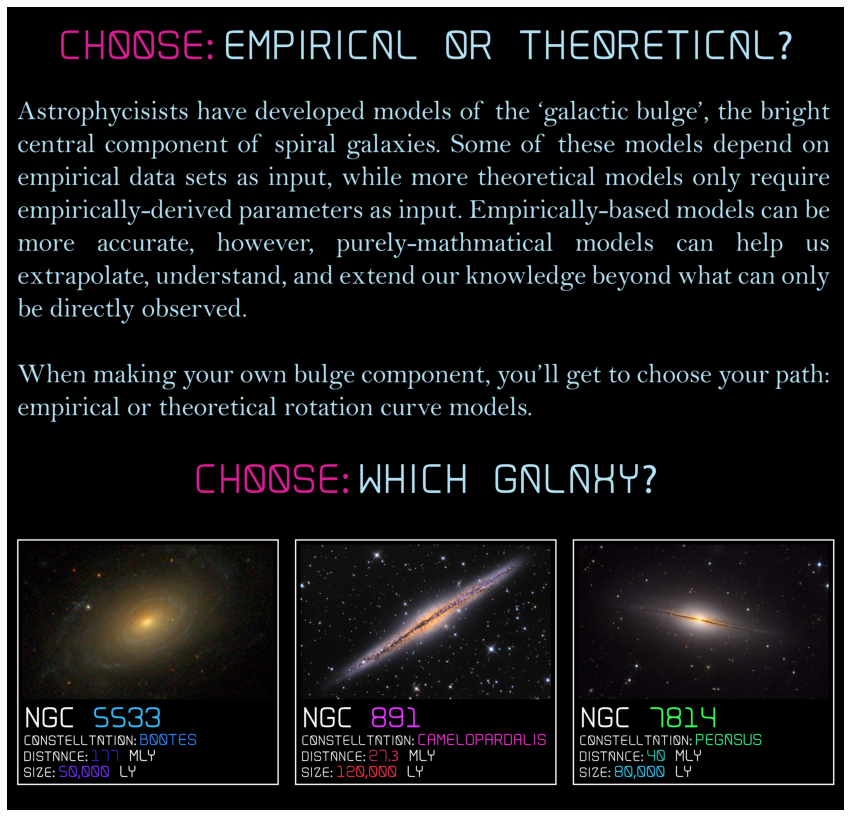

In [2]:
# Display image
img = mpimg.imread('images/bulge.png')
plt.figure(figsize=(15,17)) 
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
galaxy = "NGC7814"         # Change this value to select a galaxy out of the 3 choices: NGC5533, NGC891, NGC7814

After choosing a galaxy, restart the notebook by selecting `Kernel`--> `Restart & Run All` in the top bar. 

In [4]:
# Writing the chosen galaxy name in a text file would allow us 
# to use the selection in libraries outside of this notebook
f = open("python/galaxy_bulgeactivity.txt", "w")
f.write(galaxy)
f.close()
f = open("python/galaxy_bulgeactivity.txt", "r")
f.close()

In [5]:
import importlib
importlib.reload(b)             # Reload library so the changes take effect

<module 'bulge_library' from 'C:\\Users\\judit\\OneDrive\\Documents\\GitHub\\galactic-spin-W1\\binder\\python\\bulge_library.py'>

## Introduction

__What is a bulge?__ 
<br>A bulge is the bright central part of a spiral galaxy. In shape, bulges are ellipsoidal (spherically squished, to be scientific) and dense with stars, containing most of a spiral galaxy's visible matter.

## Equations

1. Calculate the velocity of the stars in the bulge using the empirically derived bulge parameters.

>__Gamma function__: <br>
    \begin{equation}
    \gamma(b_n,2n) = \frac{1}{2} \Gamma(2n)
    \end{equation}<br>
    \begin{equation}
    r_e = b_n^n r_0 b_n 
    \end{equation}<br>
>__Luminosity to Central surface brightness__: <br>
    \begin{equation}
    I_0 = L_b \frac{(b_n)^{2n}}{2\pi n \ r^2_e \ \Gamma(2n)}
    \end{equation}<br>
    <br>
>where:<br>
        $I_0$ = central surface brightness<br>
        $L_b$ = luminosity of bulge <br>
        $n$ = concentration parameter<br> 
        $r_0$ = characteristic radius (related to $r_e$)<br>
        $r_e$ = effective radius<br>
        
>__Velocity__: <br>
    <font color="green">
    \begin{equation}
V_{B}^{2}(r) = C \int_{m=0}^{r} \left[\int_{\kappa=m}^{\infty} \frac {e^{-\left(\frac{\kappa}{r_0}\right)^{\frac{1}{n}}} \left(\frac{\kappa}{r_0}\right)^{\frac{1}{n}-1}} {\sqrt{\kappa^2-m^2}} d\kappa\right] \times \frac{m^{2}}{\sqrt{r^{2}-m^{2}e^{2}}} dm
    \end{equation}<br></font>
>where:<br>
    \begin{equation}
    C = \frac{4Gq\Upsilon_b I_0}{r_0n} \sqrt{sin^{2}i + \frac{1}{q^{2}} cos^{2}i}
    \end{equation}<br>
    \begin{equation}
    e = \sqrt{1-q^{2}}
    \end{equation}<br> 
        $\Upsilon_b$ = mass-to-light ratio<br>
        $e$ = eccentricity of the bulge<br>
        $q$ = intrinsic axis ratio<br> 
        $i$ = inclination angle<br> 
        $G$ = gravitational constant<br>

## Definitions of necessary bulge parameters

<b>Concentration parameter ($n$)</b> [unitless]: also known as the bulge Sersic parameter _"that describes the curvature of the profile in a radius-magnitude plot"_ (Noordermeer 2008). <br>

<b>Intrinsic axis ratio ($q$)</b> [unitless]: _"q [is] the intrinsic axis ratio of the bulge isodensity surfaces"_ (Noordermeer 2008). This parameter describes how flat a galaxy appears. The eccentricity of the galaxy can be calculated using this parameter: $e$ = $\sqrt{1 - q^{2}}$.
<br>

<b>Inclination angle ($i$)</b> [degrees]: the angle of the galaxy from the horizontal. 

<b>Effective radius ($r_e$)</b> [kpc]: "the radius which encompasses 50 percent of the light" within the bulge (Noordermeer 2008).<br>

<b>Luminosity ($L_b$)</b> [Lsun]: Total galactic luminosity of the bulge of the galaxy, in units of solar luminosity.<br>

<b>Mass-to-light ratio ($\Upsilon_b$)</b> [unitless]: the ratio of how much mass there is compared to how much it is visible. 

<b>Distance ($D$)</b> [Mpc]: the distance to the galaxy is needed to convert angular size to actual size. 

## Literature search

There are **five parameters** you will need to find to calculate the velocity of the bulge of your chosen galaxy: concentration parameter ($n$), intrinsic axis ratio ($q$), inclination angle ($i$), effective radius ($r_e$), luminosity of the bulge ($L_b$). In addition, you may also need to find the distance to the galaxy ($D$).

2. Do some research to find these parameters for any of the three galaxies (NGC 5533, NGC 891, NGC 7814) of your choice. This activity is intended to give you a glimpse into scholarly literature search. You can also choose an entirely different galaxy and calculate the velocity of stars in its bulge.<br>
Make sure to have the right units for each parameter.<br>

### Concentration parameter [unitless]

In [6]:
#n = ?
n = b.n          # Import

### Intrinsic axis ratio [unitless]

In [7]:
#q = ?
q = b.q

### Inclination angle [degrees]

Inclination angle is usually given in degrees. We need to convert this to radians. 

In [8]:
#i_degrees = ?
i_degrees = b.i

# Equation to convert degrees to radians
i_rad = i_degrees * (np.pi/180)

### Effective radius [kpc]

In [9]:
#re_kpc = ?
re_kpc = b.re_kpc 

The effective radius might be given in units of arcseconds. This is a unit of an angle of how large something appears in the sky. In this case, you can use trigonometry to calculate the actual size. For this computation, find the distance to your galaxy to be able to convert from arcseconds to kiloparsec. <br>
If the effective radius is already in the right units (in kpc), comment out the next `Code` cell. 

3. Using a right triangle and a small angle approximation, convert arcseconds to kpc in the following way:

>__Getting the right units__: <br>
    \begin{equation}
    1 \rm \ arcsec = \frac{1}{3600 ^\circ} = \frac{\pi}{180^\circ} \times \frac{1}{3600^\circ} = \frac{\pi}{648000} \ radians
    \end{equation}
     <br>
    \begin{equation}
    1 \rm \ Mpc = 1000 \rm \ kpc
    \end{equation} <br>
>__Arcsec to kpc__: <br>
    \begin{equation}
    \tan (\theta) \approx \theta \approx \frac{S}{D}
    \end{equation} 
    <br>
    \begin{equation}
    S \rm \ (in \ kpc) \approx \theta \ (in \ rad) \times D \ (in \ kpc)
    \end{equation}
    <br>
    
>where:<br>
        $\theta$ = angle the object appears in the sky<br>
        $S$ = actual size of the object<br> 
        $D$ = distance to the object<br>

### Luminosity of the bulge

In [10]:
#L = ?
Lb = b.Lb

In some cases, it is easier to find the absolute magnitude of the bulge rather than the luminosity. For example: The (R-band) absolute magnitude of the bulge ($M_b$) for NGC 5533 is listed in Source #2 (Noordermeer and Van Der Hulst, 2007), in Table A4 (Appendix) as -21.66.

4. Using the zero-point luminosity equation, calculate the luminosity of the bulge (in Watts):

>__Total luminosity of the bulge__: <br>
    \begin{equation}
    L_b = L_0 \times 10^{-0.4 M_b}
    \end{equation}
    <br>
>where:<br>
        $L_0 = 3.0128 \times 10^{28} W$ = zero-point luminosity<br>

In [11]:
#Mabs = ?
Mabs = b.Mabs

In [12]:
### Converting absolute magnitude to luminosity (if needed). 
### If the conversion is not needed, comment out this section.

# Zero point luminosity in Watts
L0 = 3.0128e28 

# Solar luminosity in Watts
Lsun = 3.838e26         

# Equation to find the luminosity in Watts
L_Watts = L0 * 10**(-0.4 * Mabs)

# Convert Watts to Solar luminosity (assuming the solar luminosity is a constant)
# Convert units (Watts to Lsun)
Lb = L_Watts / Lsun

print("The total luminosity of the bulge is {:.3e} Lsun.".format(Lb))

The total luminosity of the bulge is 7.029e+10 Lsun.


### Mass-to-light ratio

For simplicity, we are assuming a mass-to-light ratio of 1. However, this value can be found by fitting the total curve (that contains the bulge curve) to the measured values. You may also find this value during your literature search.

In [13]:
ML = 1        # Mass-to-light ratio of bulge [unitless] 

## Calculation

5. Let's calculate the velocity of the bulge using the equations discussed above. 

In [14]:
def v_bulge(r,L=Lb,re=re_kpc,n=n,q=q,i=i_rad,ML=ML):
    
    # Constant
    G = 4.300e-6       # Gravitational constant, [kpc*(km/s)**2/Msun]
    
    # Gamma function
    gammafunction = lambda x: ss.gammainc(2*n,x) * ss.gamma(2*n) - 0.5 * ss.gamma(2*n)
    bn = so.brentq(gammafunction,0,500000,
                 rtol=0.000001,maxiter=100)  # Comes within 1% of exact root within 100 iterations
    
    # Calculating I0
    I0 = L * bn**(2*n) / (2 * np.pi * n * re**2 * ss.gamma(2*n))    # Central surface brightness 
    
    # Calculating r0
    r0 = re / (bn**n)                                               # Characteristic radius (in kpc)

    # Integrand 1
    integrand1 = lambda x,m: np.exp(-np.power(x/r0,(1/n))) * np.power(x/r0,(1/n)-1) / (np.sqrt(x**2 - m**2))
    
    # Integrate integrand 1
    f_integrate1 = lambda m: si.quad(integrand1, m, np.inf, args=(m,))[0]
    f_vect1 = np.vectorize(f_integrate1)
    
    # Define C (constant)
    C = ((4 * G * q * ML * I0) / (r0 * n)) * (np.sqrt((np.sin(i_rad)**2) + (1/(q**2)) * (np.cos(i_rad)**2)))
    
    # Define eccentricity
    eccentricity = np.sqrt(1 - (q**2))  
    
    # Integrand 2
    f_integrate2 = lambda m,r: C * f_integrate1(m) * (m**2) / (np.sqrt((r**2) - ((m**2)*(eccentricity**2))))
    
    # Integrate outer function to get velocity squared
    vsq = lambda r: si.quad(f_integrate2, 0, r, args=(r,))[0]
    vsqv = np.vectorize(vsq)

    # Calculate velocity
    velocity = lambda r: np.sqrt(vsqv(r))
    
    return velocity(r)

In [15]:
# Define radius for plot
radius = np.linspace(0.01,20,100)

## Plot the velocity curve for the bulge

Note that this cell will probably take a few minutes to run. Please be patient.

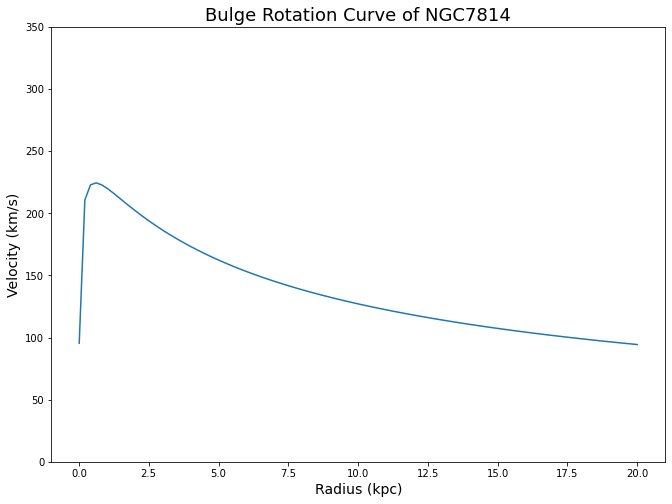

In [16]:
plt.figure(figsize=(11.0,8.0))                                      # Size of the plot
plt.plot(radius, v_bulge(radius), linestyle='solid')                # x and y values of the plot          
plt.title(str('Bulge Rotation Curve of ' + galaxy), fontsize=18)    # Title of the plot
plt.xlabel('Radius (kpc)', fontsize=14)                             # Labeling the x-axis
plt.ylabel('Velocity (km/s)', fontsize=14)                          # Labeling the y-axis
plt.ylim(0,350)                                                     # Changing the limit of the y-axis   
plt.show()

## Questions

##### Does the bulge have any effect on the rotation of the stars at 15 kpc?

##### What effect does decreasing the concentration parameter, $n$, have on the rotation curve?

##### How does the amplitude of the curve changes when increasing the mass-to-light ratio (ML or $\Upsilon_b$) of the bulge?

## References

>1. Noordermeer, Edo (October 22, 2008). **“The Rotation Curves of Flattened Sérsic Bulges.”** _Monthly Notices of the Royal Astronomical Society_ 385, no. 3: 1359–64. https://doi.org/10.1111/j.1365-2966.2008.12837.x. <br><br>
>2. Noordermeer, E., and J. M. Van Der Hulst. **“The Stellar Mass Distribution in Early-Type Disc Galaxies: Surface Photometry and Bulge–Disc Decompositions.”** _Monthly Notices of the Royal Astronomical Society_ 376, no. 4 (April 2007): 1480–1512. https://doi.org/10.1111/j.1365-2966.2007.11532.x. <br><br>
>3. Fraternali F, Sancisi R, Kamphuis P. **"A tale of two galaxies: light and mass in NGC 891 and NGC 7814."** _Astronomy & Astrophysics_. 2011;531:A64. https://doi:10.1051/0004-6361/201116634. <br><br>
>4. Mamajek, E. E. et al. (October, 2015) **"IAU 2015 Resolution B2 on Recommended Zero Points for the Absolute and Apparent Bolometric Magnitude Scales."** eprint arXiv:1510.06262. https://ui.adsabs.harvard.edu/abs/2015arXiv151006262M/abstract <br><br>
>5. Carroll, B. W.; Ostlie, D. A. (2006). **"An Introduction to Modern Astrophysics (2nd ed.)."** Pearson. pp. 60–62. ISBN 978-0-321-44284-0. <br><br>
>6. Graham, A. W. (2001). **"An investigation into the prominence of spiral galaxy bulges."** The Astronomical Journal, 121(2), 820–840. https://doi.org/10.1086/318767 

In [17]:
executionTime = (time.time() - startTime)
print(f'Execution time: {executionTime:.2f} seconds')

Execution time: 91.32 seconds


## Literature search check

Did you research and locate the parameter values for your chosen galaxy? Click the 'Reveal!' button below to check your work! If you got any values wrong, you could refer to the citation by each value to see exactly which paper and table the value can be found in.

In [18]:
from IPython.display import display
display(b.button)
b.button.on_click(b.on_button_clicked)

Button(description='Reveal!', style=ButtonStyle())